In [19]:
!pip install folium

   ---------------------------------------- 0.0/110.5 kB ? eta -:--:--
   --- ------------------------------------ 10.2/110.5 kB ? eta -:--:--
   ---------- ---------------------------- 30.7/110.5 kB 330.3 kB/s eta 0:00:01
   ------------------------- ------------- 71.7/110.5 kB 563.7 kB/s eta 0:00:01
   -------------------------------------- 110.5/110.5 kB 802.2 kB/s eta 0:00:00


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

df = pd.read_csv("US_Accidents.csv") 

In [33]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], dayfirst=True, errors='coerce')
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month_name()

C:\Users\sinci\AppData\Local\Temp\ipykernel_16668\3514439397.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=df, palette='coolwarm')


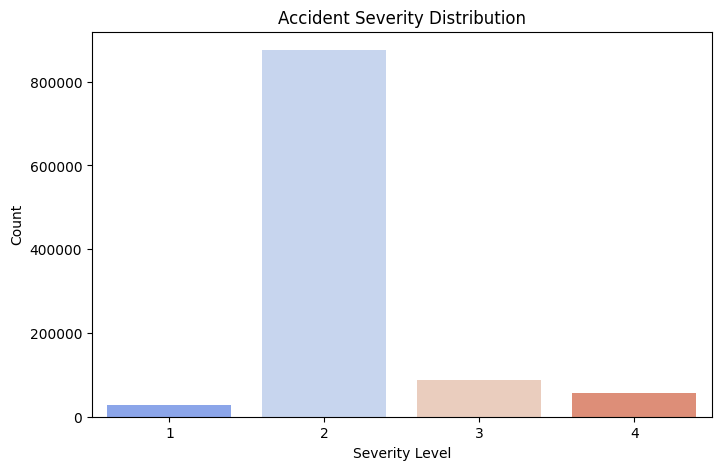

In [34]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity', data=df, palette='coolwarm')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.show()

C:\Users\sinci\AppData\Local\Temp\ipykernel_16668\2658650804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df, palette='viridis')


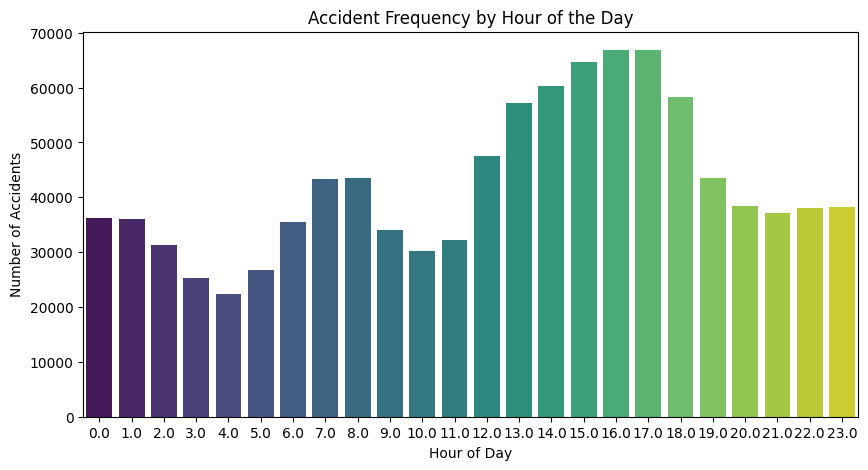

In [35]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title("Accident Frequency by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Accidents")
plt.xticks(range(0, 24))
plt.show()

C:\Users\sinci\AppData\Local\Temp\ipykernel_16668\217057930.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Day_of_Week', data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette='magma')


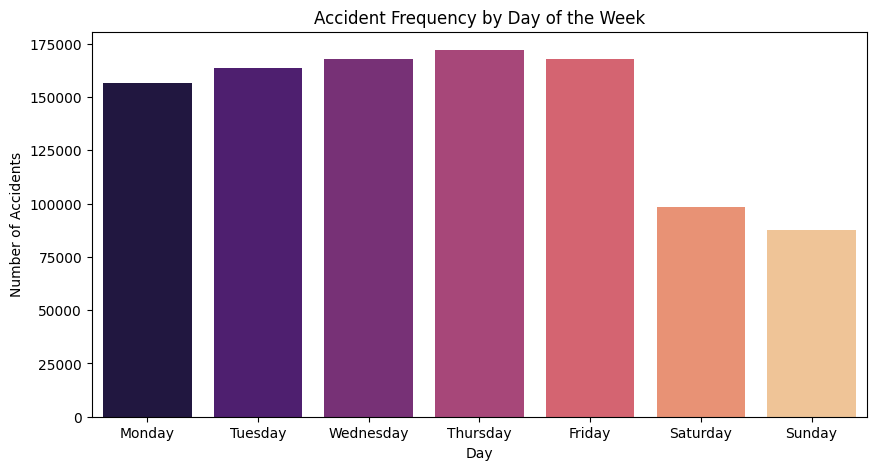

In [39]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Day_of_Week', data=df, order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette='magma')
plt.title("Accident Frequency by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Accidents")
plt.show()

C:\Users\sinci\AppData\Local\Temp\ipykernel_16668\3541200637.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sunrise_Sunset', y='Severity', data=df, palette='coolwarm')


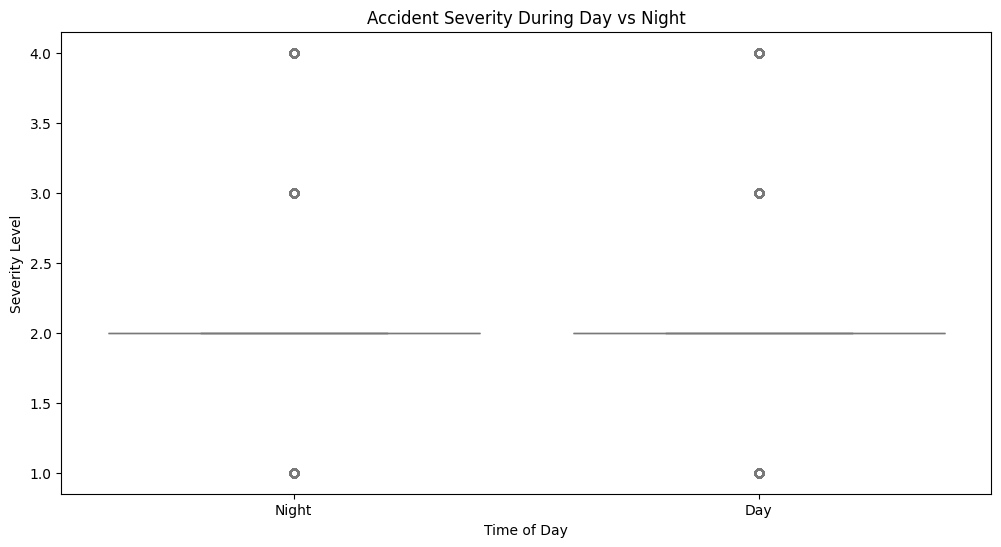

In [41]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sunrise_Sunset', y='Severity', data=df, palette='coolwarm')
plt.title("Accident Severity During Day vs Night")
plt.xlabel("Time of Day")
plt.ylabel("Severity Level")
plt.show()

In [45]:
map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=6)
heat_data = df[['Start_Lat', 'Start_Lng']].dropna().values.tolist()
HeatMap(heat_data, radius=8).add_to(accident_map)
accident_map.save("accident_hotspots.html")  
print("Accident hotspot map saved as 'accident_hotspots.html'")

Accident hotspot map saved as 'accident_hotspots.html'
